In [ ]:
import cv2
import numpy as np
import zipfile
from PIL import Image
import io
from matplotlib import pyplot as plt
from scipy import ndimage, misc
import math
import pandas as pd

In [2]:
archive = zipfile.ZipFile('Heightmap/20210601_FX10_heightmap.zip', 'r')

In [3]:
imgdata = archive.read('Params_SpecimFX10_IL401_20210601-001_heightmap.png')

In [4]:
bytes_io = io.BytesIO(imgdata)

In [5]:
img = Image.open(bytes_io).convert('L') 

In [6]:
im = np.array(img) 

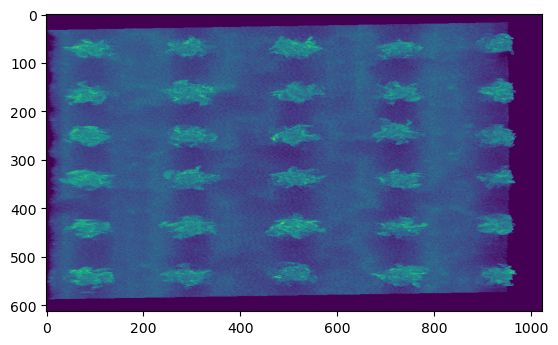

In [7]:
plt.imshow(im)
plt.show()

In [8]:
data_max = ndimage.maximum_filter(im, 100, mode = 'nearest')

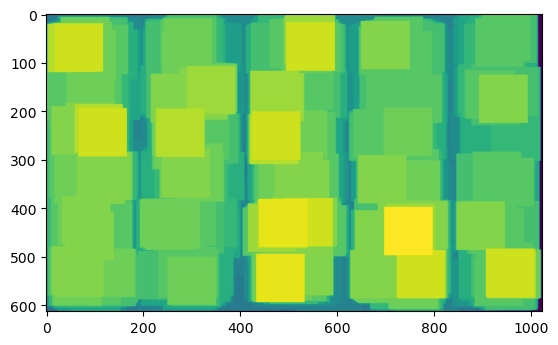

In [9]:
plt.imshow(data_max)
plt.show()

In [10]:
maxima = (im == data_max)
data_min = ndimage.minimum_filter(im, 100)
diff = ((data_max - data_min) > 10)
maxima[diff == 0] = 0

In [11]:
labeled, num_objects = ndimage.label(maxima)

In [12]:
xy = np.array(ndimage.center_of_mass(im, labeled, range(1, num_objects+1)))

In [13]:
def dist2(p1, p2):
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2

def fuse(points, d):
    ret = []
    ret2 = []
    d2 = d * d
    n = len(points)
    taken = [False] * n
    for i in range(n):
        if not taken[i]:
            count = 1
            point = [points[i][0], points[i][1]]
            taken[i] = True
            for j in range(i+1, n):
                if dist2(points[i], points[j]) < d2:
                    point[0] += points[j][0]
                    point[1] += points[j][1]
                    count+=1
                    taken[j] = True
            point[0] /= count
            point[1] /= count
            ret.append([point[0], point[1]])
            ret2.append((int(point[0]), int(point[1])))
    return np.array(ret), ret2

In [14]:
test, test2 = fuse(xy, 80)

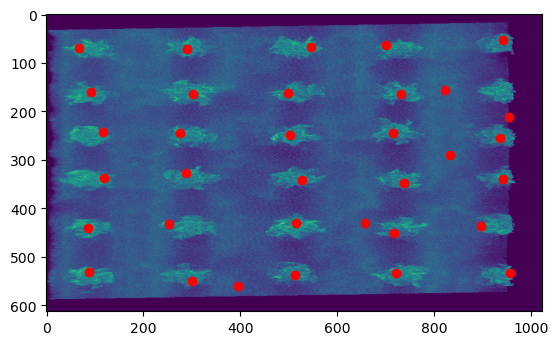

In [15]:
plt.imshow(im)
plt.autoscale(False)
plt.plot(test[:, 1], test[:, 0], 'ro')
plt.show()

In [16]:
coord = pd.read_csv('Sativa_Coordinates2_FX10.csv') 

In [17]:
from ast import literal_eval
centers = []
for x in coord[coord['id'] == "IL401"]:
    if x != "id":
        coo_row = coord[coord['id'] == "IL401"][x].values[0]
        xy = literal_eval(coo_row)
        centers.append(xy)

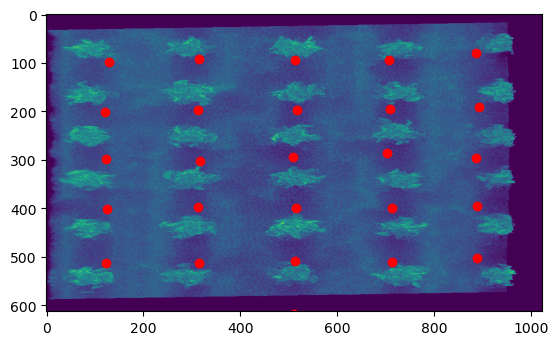

In [18]:
plt.imshow(im)
plt.autoscale(False)
plt.plot(*zip(*centers), 'ro')
plt.show()

In [19]:
#from numba import jit
#@jit(nopython=True)

def function(coordinates):
    rows,cols = im.shape
    new_im = np.copy(im) 
    for i in range(rows):
        for j in range(cols):
            k = im[i,j]
            for x in coordinates:
                #d = dist2((i,j), x)
                d = (i-x[0])**2 + (j-x[1])**2
                if d < 3500 and k > 10:
                    new_im[i,j] = 255
    return new_im

new_im = function(centers)

In [20]:
new_im

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

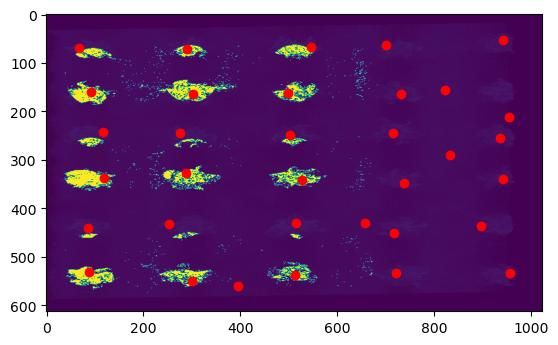

In [21]:
plt.imshow(new_im)
plt.autoscale(False)
plt.plot(test[:, 1], test[:, 0], 'ro')
plt.show()

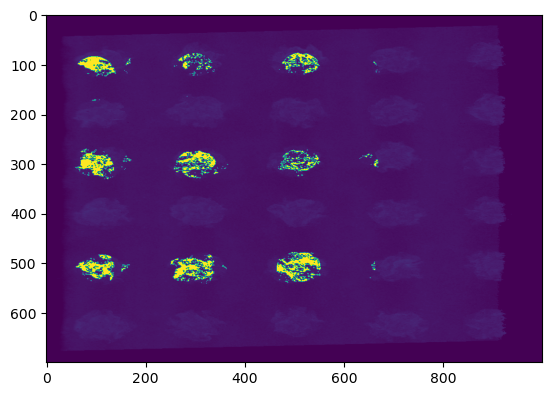

In [2]:
img = cv2.imread('401test.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [21]:
dfs = pd.read_csv('LinkLettuce/IL401_0521.tsv', sep='\t')

In [24]:
ul = dfs['Label'].unique()
new_im = np.copy(im)
new_im[:,:] = 0
y = dfs.loc[dfs['Label'] == ul[2]]["Y"].values
x = dfs.loc[dfs['Label'] == ul[2]]["X"].values
for yy, xx in zip(y,x):
    new_im[yy, xx] = im[yy,xx]
    print(yy,xx,im[yy,xx])
    
    #cv2.imwrite(name, new_im)

47 171 9
47 172 8
48 42 7
59 80 14
59 81 14
59 82 15
60 71 11
60 72 11
60 73 9
60 74 7
60 75 7
60 76 6
60 78 9
60 79 10
60 80 11
60 81 13
60 82 13
61 69 10
61 70 10
61 71 11
61 72 11
61 73 12
61 74 13
61 75 13
61 76 10
61 77 11
61 78 13
61 79 14
61 80 16
61 81 10
61 112 12
61 113 13
61 114 15
61 115 16
62 70 14
62 71 14
62 72 8
62 73 10
62 74 11
62 75 13
62 76 14
62 77 15
62 78 16
62 79 16
62 80 16
62 81 17
62 85 14
62 86 13
62 111 14
62 112 10
62 113 11
62 114 12
62 115 13
63 73 15
63 74 15
63 75 16
63 76 16
63 77 15
63 78 14
63 79 13
63 80 13
63 81 13
63 82 13
63 83 12
63 84 12
63 85 13
63 86 14
63 87 14
63 89 15
63 90 16
63 91 15
63 92 13
63 110 12
63 111 11
63 112 11
63 113 11
63 114 13
63 115 14
63 116 16
64 74 16
64 75 16
64 76 16
64 77 15
64 78 15
64 79 15
64 80 16
64 81 14
64 82 15
64 83 15
64 84 15
64 85 15
64 86 15
64 87 12
64 88 13
64 89 13
64 90 13
64 106 14
64 107 14
64 111 11
64 112 12
64 113 12
64 114 12
64 115 13
64 139 7
64 140 7
65 75 18
65 76 18
65 77 19
65 78 18
65 

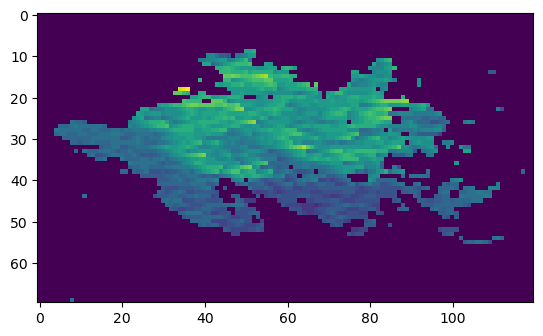

In [35]:
plt.imshow(new_im[50:120, 30:150])
plt.show()

In [33]:
archive = zipfile.ZipFile('Heightmap/20210528_FX10_heightmap.zip', 'r')

In [34]:
imgdata = archive.read('Params_SpecimFX10_IL401_20210528-001_heightmap.png')

In [35]:
bytes_io = io.BytesIO(imgdata)

In [36]:
img = Image.open(bytes_io).convert('L') 

In [37]:
im2 = np.array(img) 

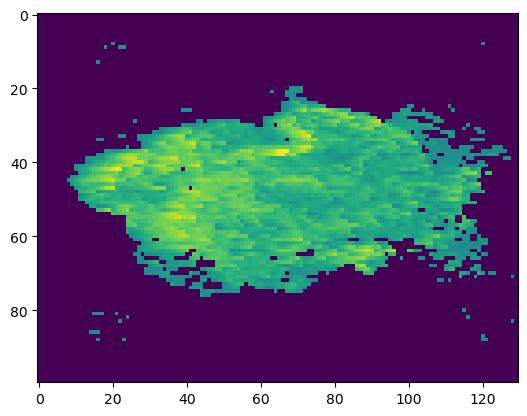

In [51]:
dfs2 = pd.read_csv('LinkLettuce/IL401_0528.tsv', sep='\t')
ul2 = dfs2['Label'].unique()
new_im2 = np.copy(im2)
new_im2[:,:] = 0
y = dfs2.loc[dfs2['Label'] == ul2[4]]["Y"].values
x = dfs2.loc[dfs2['Label'] == ul2[4]]["X"].values
for yy, xx in zip(y,x):
    if im2[yy,xx] > 15:
        new_im2[yy, xx] = im2[yy,xx]
    
plt.imshow(new_im2[50:150, 50:180])
plt.show()

In [53]:
archive = zipfile.ZipFile('Heightmap/20210528_FX10_heightmap.zip', 'r')

In [54]:
imgdata = archive.read('Params_SpecimFX10_IL401_20210528-001_heightmap.png')

In [55]:
bytes_io = io.BytesIO(imgdata)

In [56]:
img = Image.open(bytes_io).convert('L') 

In [57]:
im3 = np.array(img) 

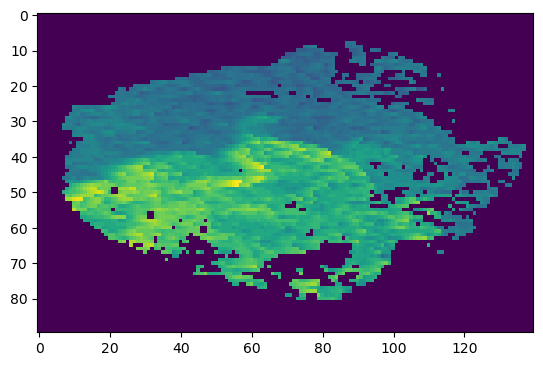

In [70]:
dfs3 = pd.read_csv('LinkLettuce/IL401_0601.tsv', sep='\t')
ul3 = dfs3['Label'].unique()
new_im3 = np.copy(im3)
new_im3[:,:] = 0
y = dfs3.loc[dfs3['Label'] == ul3[3]]["Y"].values
x = dfs3.loc[dfs3['Label'] == ul3[3]]["X"].values
for yy, xx in zip(y,x):
    if im3[yy,xx] > 1:
        new_im3[yy, xx] = im3[yy,xx]
    
plt.imshow(new_im3[40:130, 60:200])
plt.show()

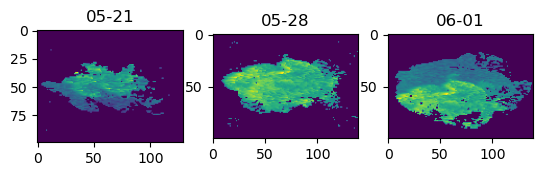

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_title("05-21")
ax1.imshow(new_im[30:130, 30:160])
ax2.set_title("05-28")
ax2.imshow(new_im2[50:150, 50:190])
ax3.set_title("06-01")
ax3.imshow(new_im3[30:130, 60:200])

In [84]:
fig.savefig('foo.png')

In [86]:
archive = zipfile.ZipFile('Heightmap/20210604_FX10_heightmap.zip', 'r')
imgdata = archive.read('Params_SpecimFX10_IL401_20210604-001_heightmap.png')
bytes_io = io.BytesIO(imgdata)
img = Image.open(bytes_io).convert('L') 
im4 = np.array(img) 

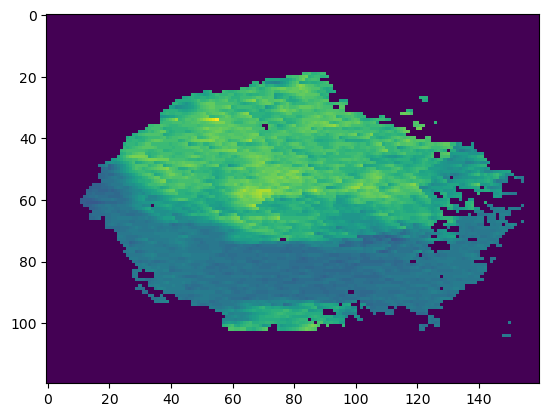

In [96]:
dfs4 = pd.read_csv('LinkLettuce/IL401_0604.tsv', sep='\t')
ul4 = dfs4['Label'].unique()
new_im4 = np.copy(im3)
new_im4[:,:] = 0
y = dfs4.loc[dfs4['Label'] == ul4[4]]["Y"].values
x = dfs4.loc[dfs4['Label'] == ul4[4]]["X"].values
for yy, xx in zip(y,x):
    if im4[yy,xx] > 1:
        new_im4[yy, xx] = im4[yy,xx]
    
plt.imshow(new_im4[30:150, 60:220])
plt.show()

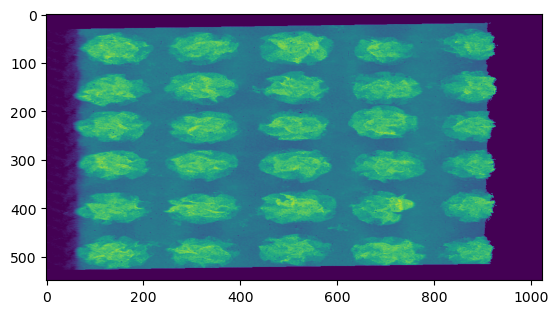

In [161]:
plt.imshow(im4)
plt.show()

In [97]:
archive = zipfile.ZipFile('Heightmap/20210608_FX10_heightmap.zip', 'r')
imgdata = archive.read('Params_SpecimFX10_IL401_20210608-001_heightmap.png')
bytes_io = io.BytesIO(imgdata)
img = Image.open(bytes_io).convert('L') 
im5 = np.array(img)

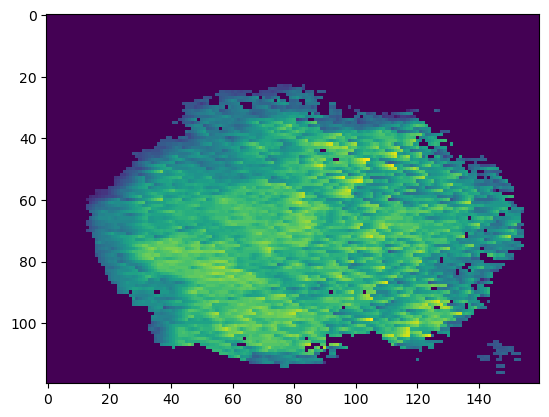

In [105]:
dfs5 = pd.read_csv('LinkLettuce/IL401_0608.tsv', sep='\t')
ul5 = dfs5['Label'].unique()
new_im5 = np.copy(im5)
new_im5[:,:] = 0
y = dfs5.loc[dfs5['Label'] == ul5[4]]["Y"].values
x = dfs5.loc[dfs5['Label'] == ul5[4]]["X"].values
for yy, xx in zip(y,x):
    if im5[yy,xx] > 1:
        new_im5[yy, xx] = im5[yy,xx]
    
plt.imshow(new_im5[30:150, 80:240])
plt.show()

In [108]:
archive = zipfile.ZipFile('Heightmap/20210611_FX10_heightmap.zip', 'r')
imgdata = archive.read('Params_SpecimFX10_IL401_20210611-001_heightmap.png')
bytes_io = io.BytesIO(imgdata)
img = Image.open(bytes_io).convert('L') 
im6 = np.array(img)

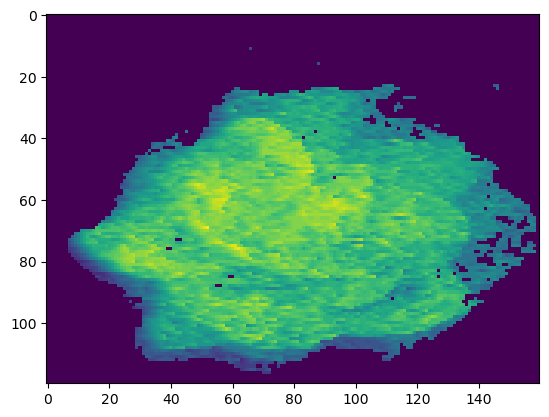

In [117]:
dfs6 = pd.read_csv('LinkLettuce/IL401_0611.tsv', sep='\t')
ul6 = dfs6['Label'].unique()
new_im6 = np.copy(im6)
new_im6[:,:] = 0
y = dfs6.loc[dfs6['Label'] == ul6[5]]["Y"].values
x = dfs6.loc[dfs6['Label'] == ul6[5]]["X"].values
for yy, xx in zip(y,x):
    if im6[yy,xx] > 1:
        new_im6[yy, xx] = im6[yy,xx]
    
plt.imshow(new_im6[30:150, 100:260])
plt.show()

In [120]:
archive = zipfile.ZipFile('Heightmap/20210618_FX10_heightmap.zip', 'r')
imgdata = archive.read('Params_SpecimFX10_IL401_20210618-001_heightmap.png')
bytes_io = io.BytesIO(imgdata)
img = Image.open(bytes_io).convert('L') 
im7 = np.array(img)

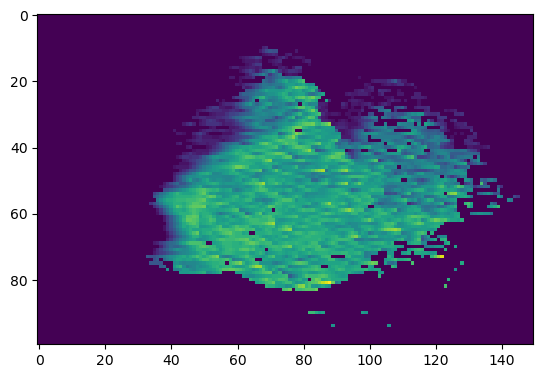

In [135]:
dfs7 = pd.read_csv('LinkLettuce/IL401_0618.tsv', sep='\t')
ul7 = dfs7['Label'].unique()
new_im7 = np.copy(im7)
new_im7[:,:] = 0
y = dfs7.loc[dfs7['Label'] == ul7[4]]["Y"].values
x = dfs7.loc[dfs7['Label'] == ul7[4]]["X"].values
for yy, xx in zip(y,x):
    if im7[yy,xx] > 1:
        new_im7[yy, xx] = im7[yy,xx]
    
plt.imshow(new_im7[40:140, 130:280])
plt.show()

In [141]:
archive = zipfile.ZipFile('Heightmap/20210625_FX10_heightmap.zip', 'r')
imgdata = archive.read('Params_SpecimFX10_IL401_20210625-001_heightmap.png')
bytes_io = io.BytesIO(imgdata)
img = Image.open(bytes_io).convert('L') 
im8 = np.array(img)

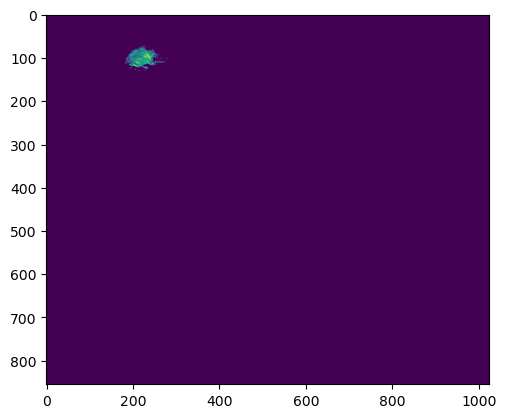

In [142]:
dfs8 = pd.read_csv('LinkLettuce/IL401_0625.tsv', sep='\t')
ul8 = dfs8['Label'].unique()
new_im8 = np.copy(im8)
new_im8[:,:] = 0
y = dfs8.loc[dfs8['Label'] == ul8[4]]["Y"].values
x = dfs8.loc[dfs8['Label'] == ul8[4]]["X"].values
for yy, xx in zip(y,x):
    if im8[yy,xx] > 1:
        new_im8[yy, xx] = im8[yy,xx]
    
plt.imshow(new_im8)
plt.show()

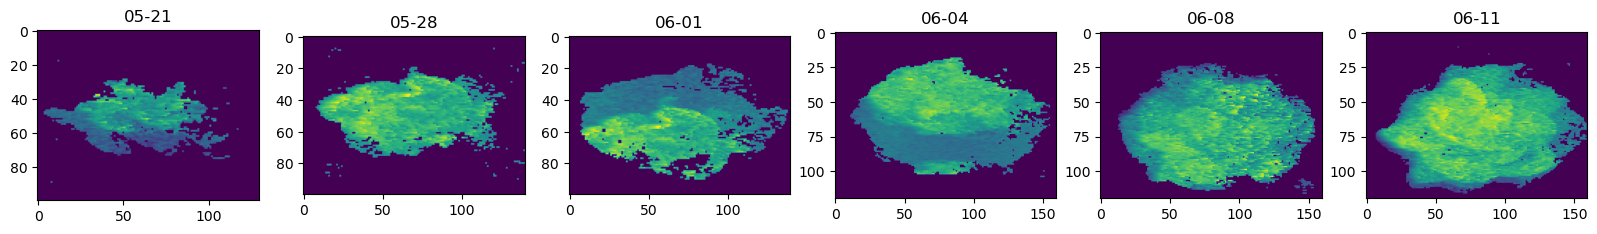

In [159]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20, 20))
ax1.set_title("05-21")
ax1.imshow(new_im[30:130, 30:160])
ax2.set_title("05-28")
ax2.imshow(new_im2[50:150, 50:190])
ax3.set_title("06-01")
ax3.imshow(new_im3[30:130, 60:200])
ax4.set_title("06-04")
ax4.imshow(new_im4[30:150, 60:220])
ax5.set_title("06-08")
ax5.imshow(new_im5[30:150, 80:240])
ax6.set_title("06-11")
ax6.imshow(new_im6[30:150, 100:260])

In [160]:
fig.savefig('foo1.png')